In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [4]:
bank = pd.read_csv("bank-full.csv", sep=";")
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
bank["poutcome"].nunique()

4

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.shape

(45211, 17)

In [9]:
bank.select_dtypes(include=['number']).corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

In [10]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank["job"] = le.fit_transform(bank["job"])
bank["marital"] = le.fit_transform(bank["marital"])
bank["education"] = le.fit_transform(bank["education"])
bank["default"] = le.fit_transform(bank["default"])
bank["housing"] = le.fit_transform(bank["housing"])
bank["loan"] = le.fit_transform(bank["loan"])
bank["contact"] = le.fit_transform(bank["contact"])
bank["month"] = le.fit_transform(bank["month"])
bank["poutcome"] = le.fit_transform(bank["poutcome"])
bank["y"] = le.fit_transform(bank["y"])

In [12]:
bank.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0

In [13]:
bank.corr()

age       job   marital  education   default   balance  \
age        1.000000 -0.021868 -0.403240  -0.106807 -0.017879  0.097783   
job       -0.021868  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.403240  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.106807  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.097783  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.185513 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan      -0.015655 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
contact    0.026221 -0.082063 -0.039201  -0.110928  0.015404 -0.027273   
day       -0.009120  0.022856 -0.005261   0.022671  0.009424  0.004503   
month     -0.042357 -0.092870 -0.006991  -0.057304  0.011486  0.019777   
duration  -0.004648  0.004744  0.011852   0.001935 -0.010021  0.021560   
campaign   0.004760  0.006839 -0.008994   0.006255  0.016822 -0.014578   
pdays     -0.023758 -0.024455  0.019172   0.000052 -0.029979  0.003435   
previous   0.001288 -0.000911  0.014973   0.017570 -0.018329  0.016674   
poutcome   0.007367  0.011010 -0.016850  -0.019361  0.034898 -0.020967   
y          0.025155  0.040438  0.045588   0.066241 -0.022419  0.052838   

            housing      loan   contact       day     month  duration  \
age       -0.185513 -0.015655  0.026221 -0.009120 -0.042357 -0.004648   
job       -0.125363 -0.033004 -0.082063  0.022856 -0.092870  0.004744   
marital   -0.016096 -0.046893 -0.039201 -0.005261 -0.006991  0.011852   
education -0.090790 -0.048574 -0.110928  0.022671 -0.057304  0.001935   
default   -0.006025  0.077234  0.015404  0.009424  0.011486 -0.010021   
balance   -0.068768 -0.084350 -0.027273  0.004503  0.019777  0.021560   
housing    1.000000  0.041323  0.188123 -0.027982  0.271481  0.005075   
loan       0.041323  1.000000 -0.010873  0.011370  0.022145 -0.012412   
contact    0.188123 -0.010873  1.000000 -0.027936  0.361145 -0.020839   
day       -0.027982  0.011370 -0.027936  1.000000 -0.006028 -0.030206   
month      0.271481  0.022145  0.361145 -0.006028  1.000000  0.006314   
duration   0.005075 -0.012412 -0.020839 -0.030206  0.006314  1.000000   
campaign  -0.023599  0.009980  0.019614  0.162490 -0.110031 -0.084570   
pdays      0.124178 -0.022754 -0.244816 -0.093044  0.033065 -0.001565   
previous   0.037076 -0.011043 -0.147811 -0.051710  0.022727  0.001203   
poutcome  -0.099971  0.015458  0.272214  0.083460 -0.033038  0.010925   
y         -0.139173 -0.068185 -0.148395 -0.028348 -0.024471  0.394521   

           campaign     pdays  previous  poutcome         y  
age        0.004760 -0.023758  0.001288  0.007367  0.025155  
job        0.006839 -0.024455 -0.000911  0.011010  0.040438  
marital   -0.008994  0.019172  0.014973 -0.016850  0.045588  
education  0.006255  0.000052  0.017570 -0.019361  0.066241  
default    0.016822 -0.029979 -0.018329  0.034898 -0.022419  
balance   -0.014578  0.003435  0.016674 -0.020967  0.052838  
housing   -0.023599  0.124178  0.037076 -0.099971 -0.139173  
loan       0.009980 -0.022754 -0.011043  0.015458 -0.068185  
contact    0.019614 -0.244816 -0.147811  0.272214 -0.148395  
day        0.162490 -0.093044 -0.051710  0.083460 -0.028348  
month     -0.110031  0.033065  0.022727 -0.033038 -0.024471  
duration  -0.084570 -0.001565  0.001203  0.010925  0.394521  
campaign   1.000000 -0.088628 -0.032855  0.101588 -0.073172  
pdays     -0.088628  1.000000  0.454820 -0.858362  0.103621  
previous  -0.032855  0.454820  1.000000 -0.489752  0.093236  
poutcome   0.101588 -0.858362 -0.489752  1.000000 -0.077840  
y         -0.073172  0.103621  0.093236 -0.077840  1.000000

In [14]:
# dropping contact, day,	month,	duration,	campaign,	pdays,	previous,	poutcome	columns as they are not needed
bank = bank.iloc[:,[0,1,2,3,4,5,6,7,16]]

In [15]:
# Dividing data into X and Y
X = bank.drop("y", axis = 1)
X.head()

# X = bank.iloc[:,:,-2]

age  job  marital  education  default  balance  housing  loan
0   58    4        1          2        0     2143        1     0
1   44    9        2          1        0       29        1     0
2   33    2        1          1        0        2        1     1
3   47    1        1          3        0     1506        1     0
4   33   11        2          3        0        1        0     0

In [16]:
Y = bank["y"]
Y.head()

# Y = bank.iloc[:,-1]

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [18]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# fitting logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [20]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [21]:
# Predict probabilities for x
y_scores = classifier.predict_proba(X)[:, 1]

In [22]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y, y_scores)

In [23]:
# Compute AUC
roc_auc = roc_auc_score(Y, y_scores)

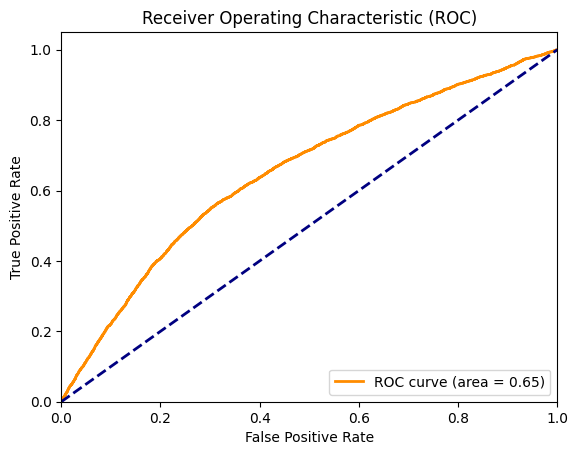

In [30]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [25]:
classifier.coef_

array([[ 0.06830941,  0.0424258 ,  0.14311606,  0.13740627, -0.06680238,
         0.07280452, -0.39269007, -0.21492611]])

In [26]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, y_pred)
cm

array([[39918,     4],
       [ 5287,     2]])

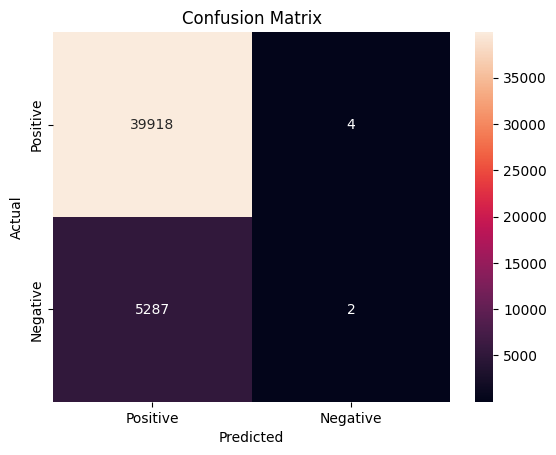

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["Positive", "Negative"]
cmdf = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(cmdf, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.33      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.61      0.50      0.47     45211
weighted avg       0.82      0.88      0.83     45211



In [ ]:
# eventhough class 1 precision is zero, total accuracy is 88%